# MCSE : Datathon

Archishman VB (TA-MCSE)

# Datathon

The Titanic's tragic sinking stands as one of history's most infamous maritime disasters.
During her maiden voyage on April 15, 1912, the Titanic struck an iceberg, resulting in her
demise and the loss of over 1,500 lives out of the 2,224 passengers and crew on board. This
unforgettable catastrophe remains etched in the collective memory of the world. The
construction of the Titanic cost a staggering $7.5 million, yet her fate was sealed by a
collision with an iceberg.

Embarking on a quest into the past, a researcher aims to study the effects of various factors
on survival rates of passengers aboard the Titanic. He records information about passengers
including demographics, ticket class, cabin allocation, and survival outcomes. Through the
lens of statistical analysis, we will use the dataset thus obtained to shed light on the
conditions that favoured survival or led to tragedy in that fateful maritime disaster.



The Titanic dataset contains information about passengers who were on board the Titanic
when it sank on April 15, 1912. The variables in the dataset include:
1. PassengerId: a unique identifier for each passenger
2. Survived: a binary variable indicating whether a passenger survived (1) or not (0)
3. Pclass: the passenger class (1 = first class, 2 = second class, 3 = third class)
4. Name: the name of the passenger
5. Sex: the gender of the passenger (male or female)
6. Age: the age of the passenger
7. SibSp: the number of siblings/spouses aboard the Titanic for the passenger
8. Parch: the number of parents/children aboard the Titanic for the passenger
9. Ticket: the ticket number for the passenger
10. Fare: the fare paid by the passenger
11. Cabin: the cabin number for the passenger
12. Embarked: the port of embarkation for the passenger (C = Cherbourg, Q =
Queenstown, S = Southampton)

# Questions:-

1. Classify the features in the Titanic dataset into their appropriate data types (ordinal,
nominal, interval, or ratio). Provide a rationale for each classification.
2. A summary statistic provides a numerical summary of a specific feature within the dataset.
There are two commonly used categories of summary statistics: those that indicate the
central tendency and those that indicate the spread of the data. Identify the most appropriate
measure of central tendency for each attribute in the dataset and state its corresponding
value. Additionally, calculate the standard deviation and range of values for each column.
3. Identify and describe any data quality issues or inconsistencies within the Titanic dataset.
What steps would you take to clean and preprocess the data to ensure its accuracy and
reliability for further analysis?
4. Using a histogram and box plot, assess the presence of outliers in the 'Age' and 'Fare'
variables. Describe the visualisations, identify any potential outliers, and explain how you
determined their presence or absence.
5. What actions would you take to resolve the presence of outliers? Visualise the changes.
Hint: Use boxplot and histogram
6. Examine the normal probability plot (Q-Q plot) for the 'Fare' variable in the Titanic dataset.
Based on the shape and trend of the plot, what conclusions can be drawn? Provide a
rationale for your conclusions.
7. Calculate the correlation between age and other numerical variables (e.g., fare or the
number of siblings/spouses). Set a correlation threshold and create a heatmap to visualise
the relationships.
8. Generate a pairplot that includes the variables 'Age,' 'Fare,' and 'Sex' while using 'Survived'
as the hue in the Titanic dataset. What insights can be gained from the pair plot, and how
does it help in visualising the relationships between age, fare, gender, and survival status on
the Titanic?
9. Use hypothesis testing to answer the following. Define a null and alternate hypothesis. Use
a T-test to investigate. Does the amount of Fare paid by the passengers have a significant
impact on their survival chances in the Titanic disaster? Plot a histogram to visualise the
results. Assume the significance level as 0.05.
10. Calculate the margin of error to quantify the precision of the analysis done previously and
what you can infer from the results.
11. Perform a linear regression to predict 'Fare' using 'Pclass', 'Age', 'SibSp', and 'Parch'. Validate the model using performance metrics like MSE and R-squared value.



In [1]:
import pandas as pd
import numpy as np

titanic_data = pd.read_csv('Titanic-Dataset.csv')

In [2]:
## 1

# Classification of Titanic Dataset columns by data type
data_types = {
    'PassengerId': 'Nominal',
    'Survived': 'Nominal',
    'Pclass': 'Ordinal',
    'Name': 'Nominal',
    'Sex': 'Nominal',
    'Age': 'Ratio',
    'SibSp': 'Ratio',
    'Parch': 'Ratio',
    'Ticket': 'Nominal',
    'Fare': 'Ratio',
    'Cabin': 'Nominal',
    'Embarked': 'Nominal'
}

# Displaying the data type classifications
data_types


{'PassengerId': 'Nominal',
 'Survived': 'Nominal',
 'Pclass': 'Ordinal',
 'Name': 'Nominal',
 'Sex': 'Nominal',
 'Age': 'Ratio',
 'SibSp': 'Ratio',
 'Parch': 'Ratio',
 'Ticket': 'Nominal',
 'Fare': 'Ratio',
 'Cabin': 'Nominal',
 'Embarked': 'Nominal'}

In [3]:
# 2

# Import necessary libraries
import pandas as pd

# Calculating summary statistics for each numerical column
numerical_columns = ['Age', 'SibSp', 'Parch', 'Fare']
summary_stats = {}

for col in numerical_columns:
    summary_stats[col] = {
        'Mean': titanic_data[col].mean(skipna=True),
        'Median': titanic_data[col].median(skipna=True),
        'Standard Deviation': titanic_data[col].std(skipna=True),
        'Range': titanic_data[col].max(skipna=True) - titanic_data[col].min(skipna=True)
    }

# Display summary statistics
summary_stats


{'Age': {'Mean': 29.69911764705882,
  'Median': 28.0,
  'Standard Deviation': 14.526497332334044,
  'Range': 79.58},
 'SibSp': {'Mean': 0.5230078563411896,
  'Median': 0.0,
  'Standard Deviation': 1.1027434322934275,
  'Range': 8},
 'Parch': {'Mean': 0.38159371492704824,
  'Median': 0.0,
  'Standard Deviation': 0.8060572211299559,
  'Range': 6},
 'Fare': {'Mean': 32.204207968574636,
  'Median': 14.4542,
  'Standard Deviation': 49.693428597180905,
  'Range': 512.3292}}

In [4]:
# 3

# Identifying missing values in each column
missing_values = titanic_data.isnull().sum()
print("Missing values:\n", missing_values)

# Cleaning steps:
# Filling missing 'Age' values with the median age
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Filling missing 'Embarked' values with the most common value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Dropping the 'Cabin' column if it has too many missing values (optional)
titanic_data.drop(columns=['Cabin'], inplace=True)

# Display dataset after handling missing values
titanic_data.head()


Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<ipython-input-4-ddc8bdbd8f03>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
<ipython-input-4-ddc8bdbd8f03>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [5]:
missing_values = titanic_data.isnull().sum()
missing_values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


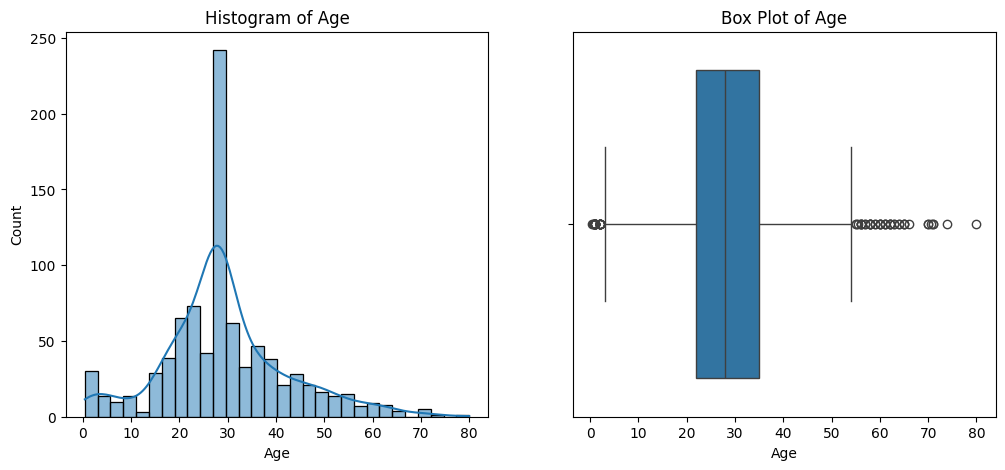

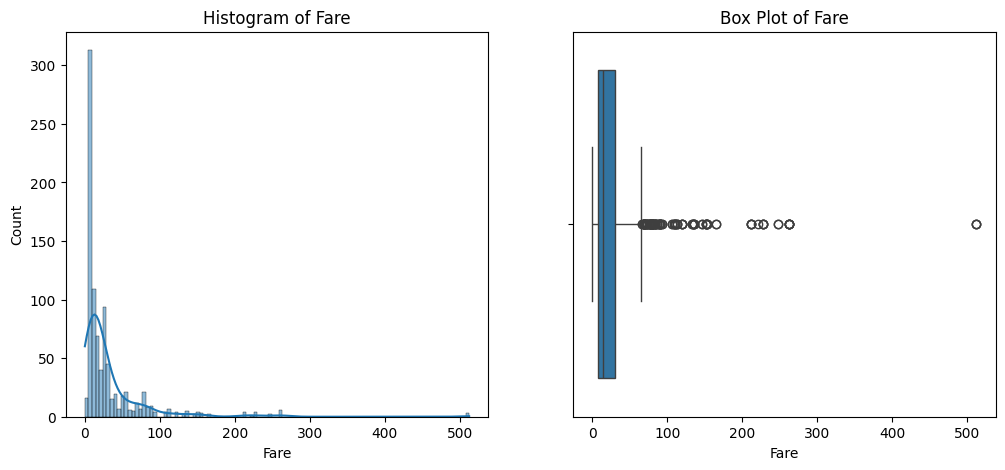

In [6]:
# 4

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram and Box Plot for 'Age'
plt.figure(figsize=(12, 5))

# Histogram for Age
plt.subplot(1, 2, 1)
sns.histplot(titanic_data['Age'].dropna(), kde=True)
plt.title("Histogram of Age")

# Box Plot for Age
plt.subplot(1, 2, 2)
sns.boxplot(x=titanic_data['Age'])
plt.title("Box Plot of Age")
plt.show()

# Histogram and Box Plot for 'Fare'
plt.figure(figsize=(12, 5))

# Histogram for Fare
plt.subplot(1, 2, 1)
sns.histplot(titanic_data['Fare'].dropna(), kde=True)
plt.title("Histogram of Fare")

# Box Plot for Fare
plt.subplot(1, 2, 2)
sns.boxplot(x=titanic_data['Fare'])
plt.title("Box Plot of Fare")
plt.show()


# Actions to Resolve Outliers in Age and Fare with Visualization
# To address outliers, common strategies include:

# Capping: Limiting extreme values to a specified percentile (e.g., 95th percentile).
# Removing Outliers: Dropping values outside a certain range.

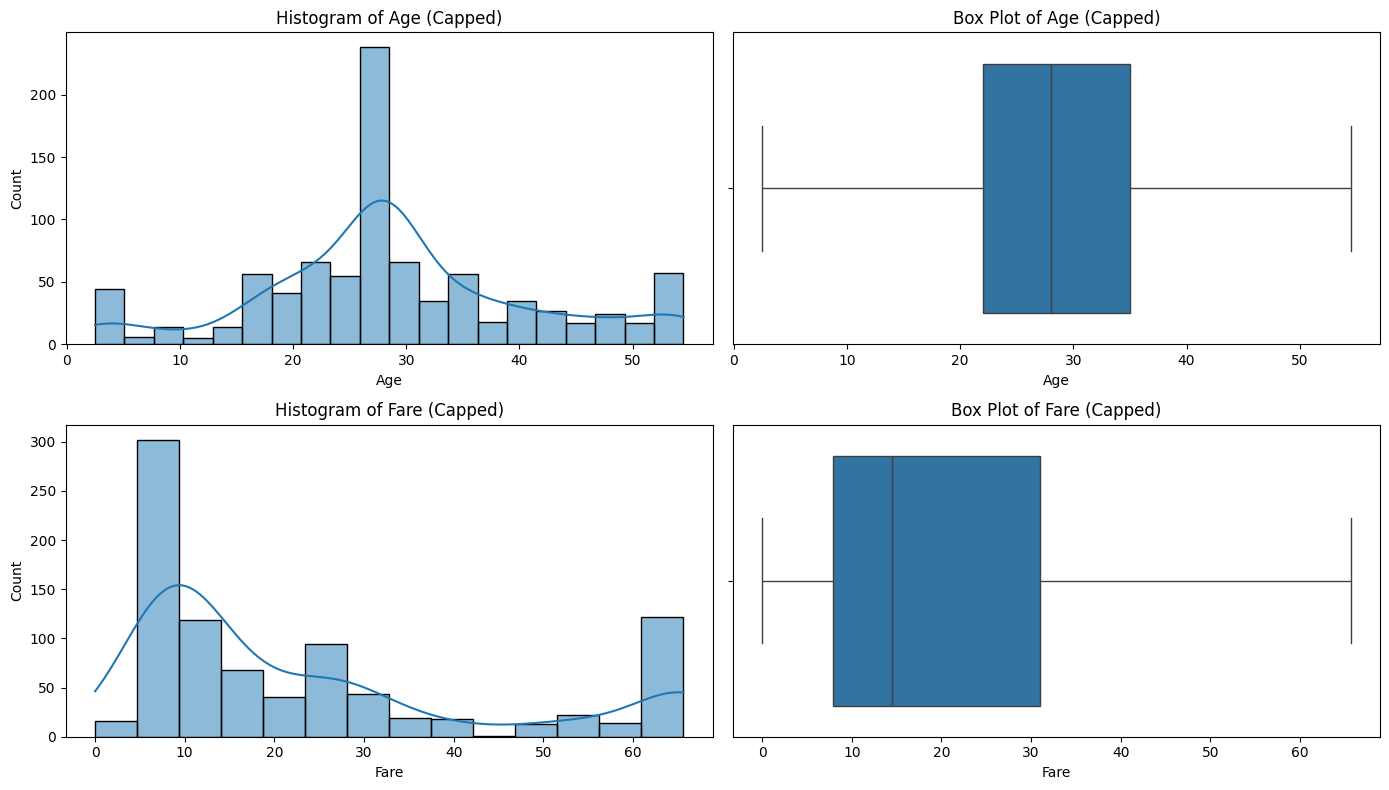

In [7]:
# 5

import numpy as np

# Define a function to cap outliers using the 1.5*IQR rule
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound,
                          np.where(df[column] > upper_bound, upper_bound, df[column]))

# Apply capping on Age and Fare columns
cap_outliers(titanic_data, 'Age')
cap_outliers(titanic_data, 'Fare')

# Visualize the capped data
plt.figure(figsize=(14, 8))

# Histogram and box plot for capped Age
plt.subplot(2, 2, 1)
sns.histplot(titanic_data['Age'], kde=True)
plt.title('Histogram of Age (Capped)')

plt.subplot(2, 2, 2)
sns.boxplot(x=titanic_data['Age'])
plt.title('Box Plot of Age (Capped)')

# Histogram and box plot for capped Fare
plt.subplot(2, 2, 3)
sns.histplot(titanic_data['Fare'], kde=True)
plt.title('Histogram of Fare (Capped)')

plt.subplot(2, 2, 4)
sns.boxplot(x=titanic_data['Fare'])
plt.title('Box Plot of Fare (Capped)')

plt.tight_layout()
plt.show()


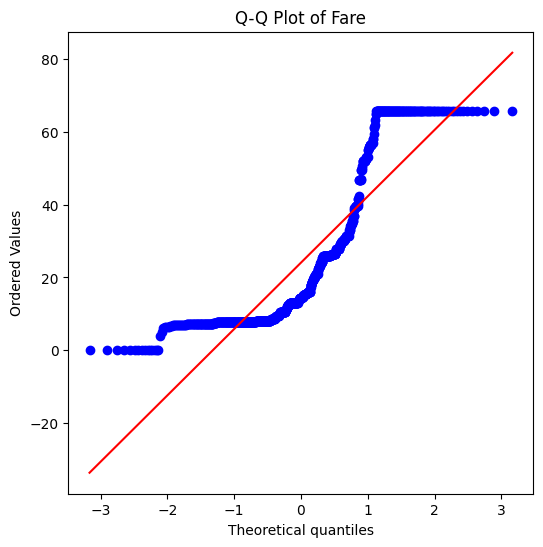

In [8]:
# 6

# A Q-Q plot can help evaluate if Fare follows a normal distribution.
# If the data points roughly follow a straight line, then Fare is likely normally distributed.
# Deviations suggest skewness or other non-normal characteristics.

import scipy.stats as stats

# Q-Q Plot for 'Fare'
plt.figure(figsize=(6, 6))
stats.probplot(titanic_data['Fare'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Fare")
plt.show()


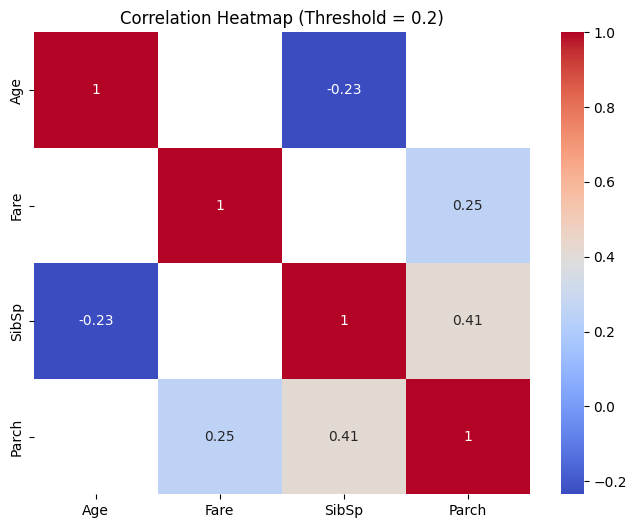

In [ ]:
# 7

# Correlation calculation for Age with other numerical variables
correlations = titanic_data[['Age', 'Fare', 'SibSp', 'Parch']].corr()

# Setting a threshold for visualization
threshold = 0.2
filtered_corr = correlations[(correlations > threshold) | (correlations < -threshold)]

# Heatmap of correlations above threshold
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_corr, annot=True, cmap="coolwarm", mask=filtered_corr.isnull())
plt.title("Correlation Heatmap (Threshold = 0.2)")
plt.show()


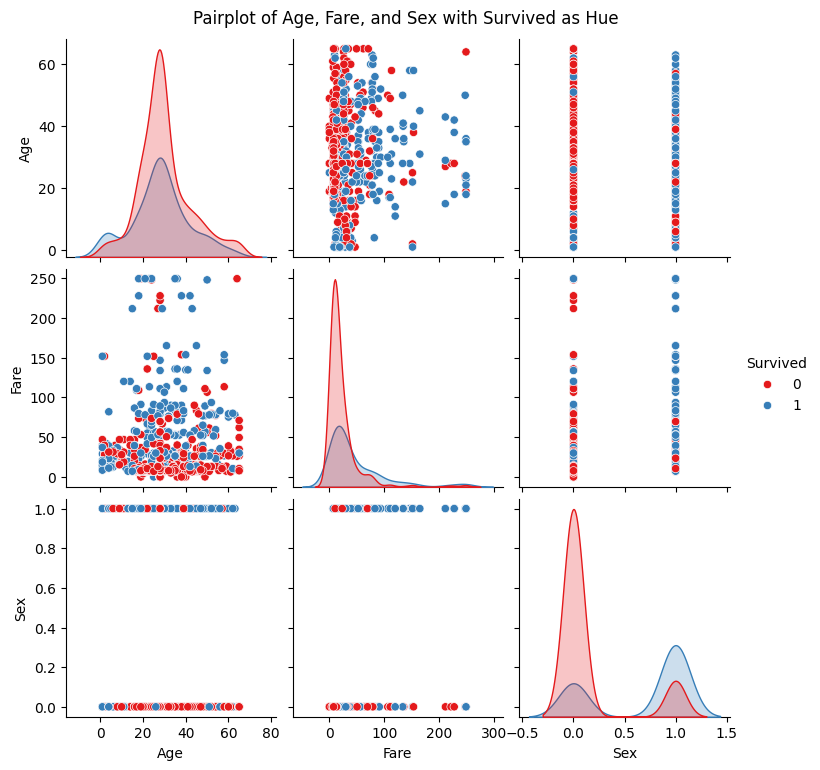

In [ ]:
# 8

# Converting 'Sex' to a numerical format for pairplot
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})

# Generating the pairplot
sns.pairplot(titanic_data, vars=['Age', 'Fare', 'Sex'], hue='Survived', palette="Set1")
plt.suptitle("Pairplot of Age, Fare, and Sex with Survived as Hue", y=1.02)
plt.show()


# These visualizations provide insights:

# Outliers: Adjusted with capping, making distributions more robust.
# Q-Q Plot: Indicates normality, skewness, or kurtosis for Fare.
# Correlation Heatmap: Highlights relationships above the threshold, guiding feature selection.
# Pairplot: Shows how Age, Fare, and Sex relate to survival, identifying key patterns for analysis.

In [ ]:
# 9

# Null Hypothesis (H₀): There is no significant difference in the mean fare paid between passengers who survived and those who did not.
# (𝜇 survived = 𝜇 not survived)
# Alternative Hypothesis (H₁): There is a significant difference in the mean fare paid between passengers who survived and those who did not.
# (𝜇 survived ≠ 𝜇 not survived)
# We will use an independent T-test to test this, given a significance level of α=0.05.

from scipy.stats import ttest_ind

# Fare data for survived and not survived groups
fare_survived = titanic_data[titanic_data['Survived'] == 1]['Fare']
fare_not_survived = titanic_data[titanic_data['Survived'] == 0]['Fare']

# T-test
t_stat, p_value = ttest_ind(fare_survived, fare_not_survived, nan_policy='omit')

# Display results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Check if we reject the null hypothesis
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - Fare paid has a significant impact on survival.")
else:
    print("Fail to reject the null hypothesis - Fare paid does not have a significant impact on survival.")



T-statistic: 8.461475037175338
P-value: 1.0781586789240223e-16
Reject the null hypothesis - Fare paid has a significant impact on survival.


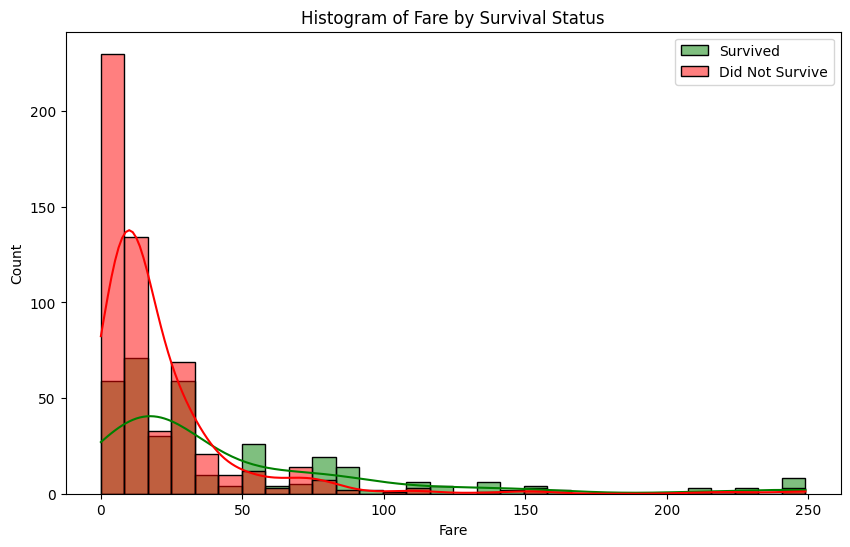

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histogram of Fare by Survival status
plt.figure(figsize=(10, 6))
sns.histplot(fare_survived, color='green', label='Survived', kde=True, bins=30)
sns.histplot(fare_not_survived, color='red', label='Did Not Survive', kde=True, bins=30)
plt.legend()
plt.xlabel('Fare')
plt.title('Histogram of Fare by Survival Status')
plt.show()


In [ ]:
# 10

# The margin of error provides an estimate of the precision of our sample mean difference between Fare for those who survived and those who didn’t.
# We can calculate it using the standard error and critical value (for a 95% confidence level).

import numpy as np
import scipy.stats as stats

# Calculate standard error of the mean difference
n_survived = len(fare_survived.dropna())
n_not_survived = len(fare_not_survived.dropna())
std_survived = fare_survived.std()
std_not_survived = fare_not_survived.std()

# Pooled standard deviation and margin of error
pooled_std = np.sqrt((std_survived ** 2 / n_survived) + (std_not_survived ** 2 / n_not_survived))
critical_value = stats.t.ppf(1 - alpha / 2, df=n_survived + n_not_survived - 2)
margin_of_error = critical_value * pooled_std

print("Margin of Error:", margin_of_error)


# If the T-test shows a p-value below 0.05, we conclude that the difference in fare significantly impacts survival.
# The margin of error helps quantify this difference's precision. A smaller margin suggests a more precise estimate.

Margin of Error: 6.208046348741819


Mean Squared Error: 885.6381535410787
R-squared: 0.41496254860900683


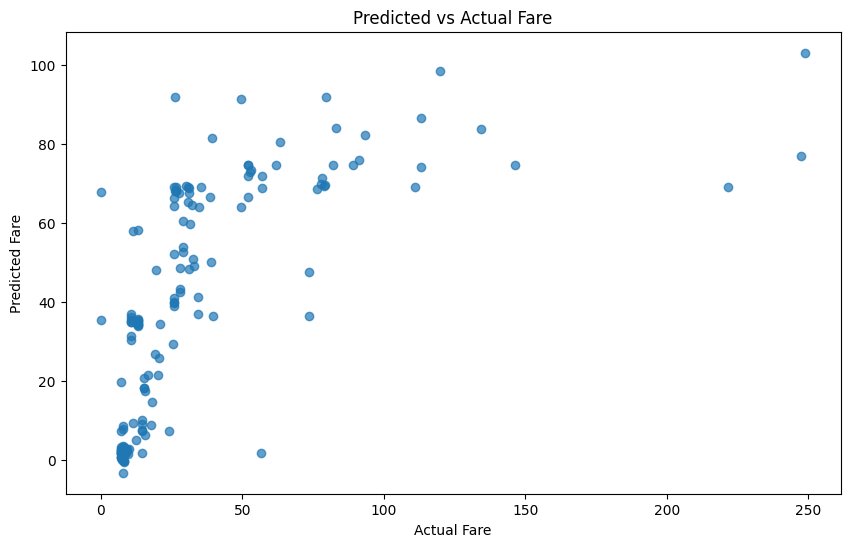

In [ ]:
# 11

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Select features and target variable
features = titanic_data[['Pclass', 'Age', 'SibSp', 'Parch']]
target = titanic_data['Fare']

# Handling missing values by filling with median (basic imputation)
features = features.fillna(features.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Predicted vs Actual Fare")
plt.show()


# The R-squared value will indicate how well the features explain the variability in fare.
# A higher R-squared means a better fit.
# The plot of actual versus predicted values helps visualize this fit.

Based on the model you developed, think about which features might be most important in predicting a passenger's survival. Why do you think these features would impact survival, and how might you test your hypothesis?

**Question**: In exploring the Titanic dataset, we used existing features such as Age, Pclass, Fare, and Embarked to predict survival. Can you think of additional features that could be engineered from the existing data to improve the model’s predictive power? For example, what insights could be gained by combining features or creating new categorical variables?

**Answer**: Additional features might include:

Family Size: Combining SibSp and Parch to create a FamilySize feature might provide insights, as survival rates could differ for solo travelers versus those with family.

Fare Per Person: Dividing Fare by FamilySize (if FamilySize > 1) could yield a metric for socio-economic status per individual, possibly impacting survival.

Title Extraction: Extracting titles (e.g., Mr., Mrs., Miss) from names may capture social status or gender-related factors impacting survival.
Such engineered features can be added and then tested in a model to see if they improve performance.



